# <div style="text-align: center"> Final Project - Introduction to Python

In [1]:
import os
import sys
import tempfile
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
img_dir = (r'/Users/sandraangotti/Documents/final project/train')
images = os.listdir(img_dir)

FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: '/Users/sandraangotti/Documents/final project/train'

In [ ]:
# list compregension 

list_full_images = [os.path.join(img_dir, img) for img in images] 

In [ ]:
list_full_images 

In [ ]:
def load_images(img_dir, n_images=1000, resize=(70, 70)):
    '''
    Load images of cats and dogs and organize into sklearn-like format.
    '''
    try:
        from keras.preprocessing.image import load_img, img_to_array
    except:
        from tensorflow.keras.preprocessing.image import load_img, img_to_array

    images = os.listdir(img_dir)
    czy_pies = np.array(['dog' in img for img in images])
    n_per_categ = n_images // 2

    n_stars = 0
    imgs, y = list(), list()
    for flt_idx, flt in enumerate([~czy_pies, czy_pies]):
        sel_images = np.array(images)[flt]
        np.random.shuffle(sel_images)
        for idx in range(n_per_categ):
            full_img_path = os.path.join(img_dir, sel_images[idx])
            imgs.append(img_to_array(load_img(full_img_path,
                                              target_size=resize)))
            y.append(flt_idx)

            # progressbar
            if idx % 20 == 0:
                print('*', end='')
                n_stars += 1
            if n_stars == 50:
                n_stars = 0
                print('')

    y = np.array(y)
    imgs = np.stack(imgs, axis=0)

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [78]:
from keras.preprocessing.image import load_img, img_to_array

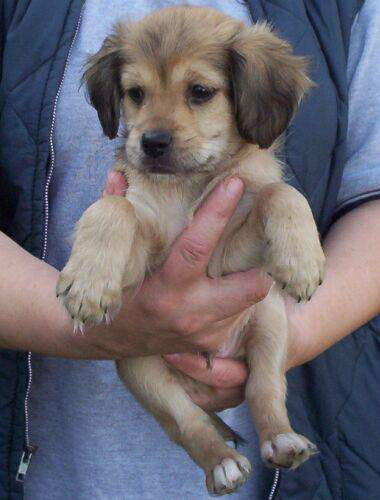

In [79]:
image_index = 0
load_img(list_full_images[image_index])

In [80]:
cat_or_dog = "cat"
image_index = 11222

In [81]:
img_file = '{}.{}.{}'.format(cat_or_dog, str(image_index), 'jpg')

In [82]:
img_file

'cat.11222.jpg'

In [83]:
img = load_img(os.path.join(img_dir, img_file))

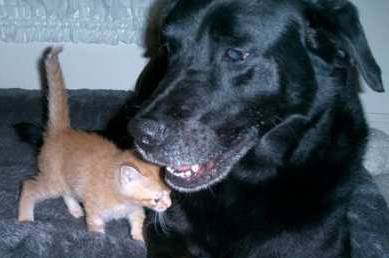

In [84]:
img

In [85]:
img_arr = img_to_array(img) # this is a 3-dimensional list 

In [86]:
img_arr.shape

(258, 389, 3)

(-0.5, 388.5, 257.5, -0.5)

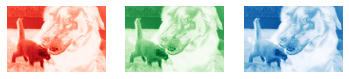

In [87]:
fig, ax = plt.subplots(ncols=3)

ax[0].imshow(img_arr[:, :, 0], cmap='Reds') 
ax[1].imshow(img_arr[:, :, 1], cmap='Greens') 
ax[2].imshow(img_arr[:, :, 2], cmap='Blues') 

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

In [88]:
def show_rgb_layers(image, subplots_args=dict()):
    '''
    Show RGB layers of the image on separate axes.
    '''
    
    im_shape = image.shape
    
#     check if the loaded image has 3 dimensions
    assert image.ndim == 3
#     check whether the last dimension of im_shape has 3 dimensions
    assert im_shape[-1] == 3
    
#     plot rgb layers
    fig, ax = plt.subplots(ncols=3)
    for idx, layer in enumerate(['Reds', 'Greens', 'Blues']):
        ax[idx].imshow(image[:, :, idx], cmap=layer)
    
    return fig

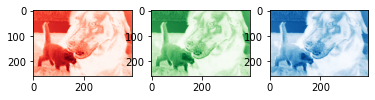

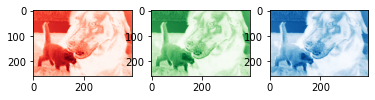

In [89]:
show_rgb_layers(img_arr)

Text(0.5, 1.0, 'cat.9141.jpg')

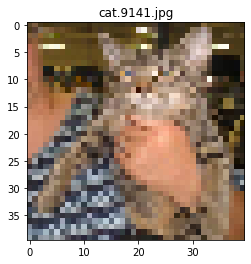

In [90]:
image_index = 12639
img = load_img(list_full_images[image_index], target_size=(40, 40))
plt.imshow(img)
plt.title(images[image_index])

(-0.5, 499.5, 415.5, -0.5)

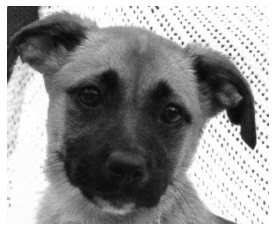

In [91]:
image_index = 77
test_image = img_to_array(load_img(list_full_images[image_index]))

test_image_gr = test_image.mean(axis=2)

plt.imshow(test_image_gr, cmap='gray') # here you can define that your map is in grey colour 

plt.axis('off')

(-0.5, 2.5, 2.5, -0.5)

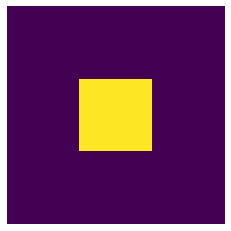

In [92]:
kernel1 = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]])

plt.imshow(kernel1)
plt.axis('off')

In [93]:
from scipy.signal import convolve2d

(-0.5, 501.5, 417.5, -0.5)

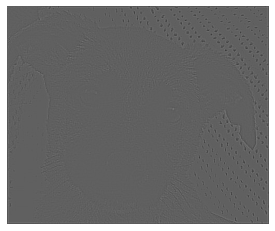

In [94]:
convolved_image1 = convolve2d(test_image_gr, kernel1)

plt.imshow(convolved_image1, cmap='gray')
plt.axis('off')

(-0.5, 2.5, 2.5, -0.5)

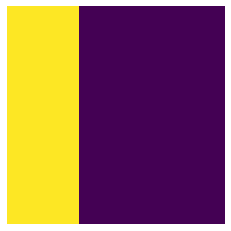

In [95]:
kernel2 = np.array([[2, -1, -1],
                    [2, -1, -1],
                    [2, -1, -1]])
plt.imshow(kernel2)
plt.axis('off')

(-0.5, 501.5, 417.5, -0.5)

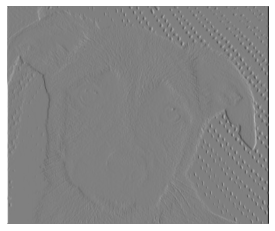

In [96]:
convolved_image2 = convolve2d(test_image_gr, kernel2)

plt.imshow(convolved_image2, cmap='gray')
plt.axis('off')

(-0.5, 3.5, 3.5, -0.5)

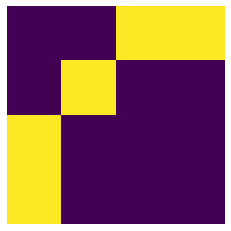

In [97]:
kernel3 = np.array([[-1, -1, 2, 2],
                   [-1, 2, -1, -1],
                   [2, -1, -1, -1],
                   [2, -1, -1, -1]])
plt.imshow(kernel3)
plt.axis('off')

(-0.5, 502.5, 418.5, -0.5)

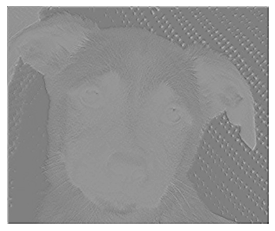

In [98]:
convolved_image3 = convolve2d(test_image_gr, kernel3)

plt.imshow(convolved_image3, cmap='gray')
plt.axis('off')

(-0.5, 502.5, 418.5, -0.5)

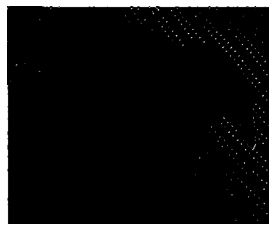

In [99]:
plt.imshow(convolved_image3 > 220, cmap='gray')
plt.axis('off')

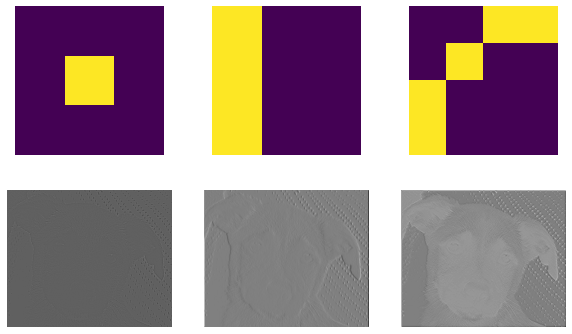

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# first line
ax[0, 0].imshow(kernel1)
ax[0, 1].imshow(kernel2)
ax[0, 2].imshow(kernel3)

# second line
ax[1, 0].imshow(convolved_image1, cmap='gray')
ax[1, 1].imshow(convolved_image2, cmap='gray')
ax[1, 2].imshow(convolved_image3, cmap='gray')

for a in ax.ravel():
    a.axis('off')

In [101]:
def load_images(img_dir, n_images=1000, resize=(50, 50)):
    '''
    Load images of cats and dogs and organize into sklearn-like format.
    '''
    try:
        from keras.preprocessing.image import load_img, img_to_array
    except:
        from tensorflow.keras.preprocessing.image import load_img, img_to_array

    images = os.listdir(img_dir)
    czy_pies = np.array(['dog' in img for img in images])
    n_per_categ = n_images // 2

    n_stars = 0
    imgs, y = list(), list()
    for flt_idx, flt in enumerate([~czy_pies, czy_pies]):
        sel_images = np.array(images)[flt]
        np.random.shuffle(sel_images)
        for idx in range(n_per_categ):
            full_img_path = os.path.join(img_dir, sel_images[idx])
            imgs.append(img_to_array(load_img(full_img_path,
                                              target_size=resize)))
            y.append(flt_idx)

            if idx % 20 == 0:
                print('*', end='')
                n_stars += 1
            if n_stars == 50:
                n_stars = 0
                print('')

    y = np.array(y)
    imgs = np.stack(imgs, axis=0)
    return imgs, y


In [102]:
X, y = load_images(img_dir, n_images=10000, resize=(50, 50))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [104]:
from keras.models import Sequential
from keras.layers import Dense

In [105]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [106]:
model = Sequential([


    Conv2D(45,(3,3), activation = 'relu' ),
    Conv2D(45,(3,3), activation = 'relu' ),
    MaxPooling2D((3,3)),

    Conv2D(28,(3,3), activation = 'relu' ),
    Conv2D(28,(3,3), activation = 'relu' ),
    MaxPooling2D((2,2)),

   Flatten( input_shape = (5, 5,28)),
    Dense(70, activation = 'relu'),

    Dense(1, activation='sigmoid')

])
model.compile(loss = 'binary_crossentropy', optimizer  = 'adam', metrics = ['accuracy'])
#loss do zmiany

In [107]:
history = model.fit(X_train, y_train, epochs = 14)

Epoch 1/14
282/282 [==============================] - 56s 192ms/step - loss: 0.9743 - accuracy: 0.5669
Epoch 2/14
282/282 [==============================] - 52s 184ms/step - loss: 0.6380 - accuracy: 0.6288
Epoch 3/14
282/282 [==============================] - 51s 181ms/step - loss: 0.6152 - accuracy: 0.6612
Epoch 4/14
282/282 [==============================] - 49s 175ms/step - loss: 0.5772 - accuracy: 0.6930
Epoch 5/14
282/282 [==============================] - 277s 986ms/step - loss: 0.5601 - accuracy: 0.7069
Epoch 6/14
282/282 [==============================] - 47s 165ms/step - loss: 0.5480 - accuracy: 0.7176
Epoch 7/14
282/282 [==============================] - 48s 170ms/step - loss: 0.5128 - accuracy: 0.7394
Epoch 8/14
282/282 [==============================] - 52s 183ms/step - loss: 0.5031 - accuracy: 0.7518
Epoch 9/14
282/282 [==============================] - 895s 3s/step - loss: 0.4711 - accuracy: 0.7708
Epoch 10/14
282/282 [==============================] - 48s 170ms/step - lo

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 45)        1260      
                                                                 
 conv2d_9 (Conv2D)           (None, 46, 46, 45)        18270     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 45)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 28)        11368     
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 28)        7084      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 28)         0         
 2D)                                                  

Accuracy on the training data:
282/282 [==============================] - 13s 47ms/step - loss: 0.3767 - accuracy: 0.8266
0.8265555500984192

Accuracy on the test data:
32/32 [==============================] - 1s 45ms/step - loss: 0.6498 - accuracy: 0.7100
0.7099999785423279


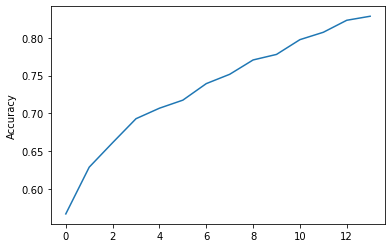

In [109]:
plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

In [110]:
# We're interested for accuracy for both training and the testing data.
# But the main point for us is accuracy for testing data.



# Accuracy on the test data was 77% what means that model was able to correctly classify 77% of pictures

In [111]:
import tensorflow as tf

In [112]:
tf.keras.models.save_model(model=model, filepath= r'/Users/sandraangotti/Documents/final project/train/cats_dogs_final_model', 
                           save_format='h5')

Text(0.5, 1.0, 'dog.4617.jpg')

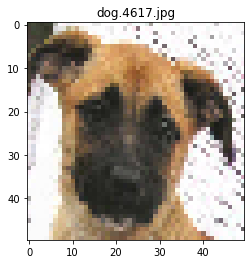

In [113]:
# Checking the model 

image_index = 77
img = load_img(list_full_images[image_index], target_size=(50, 50))
plt.imshow(img)
plt.title(images[image_index])

In [114]:
img_array = img_to_array(load_img(list_full_images[image_index], target_size = (50,50)))

In [115]:
img_array.shape

(50, 50, 3)

In [116]:
model.predict(img_array.reshape(1,50, 50, 3)) # 0 - cat, 1 - dog

array([[0.8737023]], dtype=float32)